In [334]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
# Suppress FutureWarning caused by Pandas v2.1.0
warnings.filterwarnings('ignore', category=FutureWarning)
movies_df = pd.read_csv('movies.csv')

# Set global plot styles
sns.set_theme()
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 600
plt.rcParams['axes.titlecolor'] = '#333'
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 200
plt.rcParams['axes.labelcolor'] = '#888'
plt.rcParams['legend.framealpha'] = 0.5

# Constants
MOVIE_TITLE = 'Movie Title'
AWARD_WINS = 'Award Wins'
TOTALS = r'Total Awards and Nominations'
AWARD_NOMS = 'Award Nominations'
OSCAR_WINS = 'Oscar Wins'
BOX_OFFICE = 'Box Office'
BOX_OFFICE_MIL = 'Box Office Earnings in Millions'
USD = 'Box Office Earnings in USD'
RUNTIME = 'Runtime'
RUNTIME_MINS = 'Movie Runtime in Minutes'
TO_MIL = movies_df[BOX_OFFICE] / 1000000
GENRE = 'Genre'
TOTAL = 'Total Genre Count'

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 1/4</small>
### What was the runtime for each movie?

I loaded the dataset and identified the relevant columns: "Movie Title" and "Runtime". Considering the text length of the titles compared to the runtime, I chose to go with a horizontal bar chart. <br><br>

| Movie Title                                     |   Runtime |
|:------------------------------------------------|----------:|
| Schindler's List                                |       195 |
| Pulp Fiction                                    |       154 |
| Forrest Gump                                    |       142 |
| 12 Years a Slave                                |       134 |
| Parasite                                        |       132 |
| Green Book                                      |       130 |
| Spotlight                                       |       129 |
| The Shape of Water                              |       123 |
| Argo                                            |       120 |
| Birdman or (The Unexpected Virtue of Ignorance) |       119 |
| The King's Speech                               |       118 |
| Life Is Beautiful                               |       116 |
| Moonlight                                       |       111 |
| The Usual Suspects                              |       106 |
| The Artist                                      |       100 |

In [335]:
# Generate markdown table
runtime_df = movies_df[[MOVIE_TITLE, RUNTIME]]
sorted_runtime_df = runtime_df.sort_values(by=RUNTIME, ascending=False)
markdown_table = sorted_runtime_df.to_markdown(index=False)

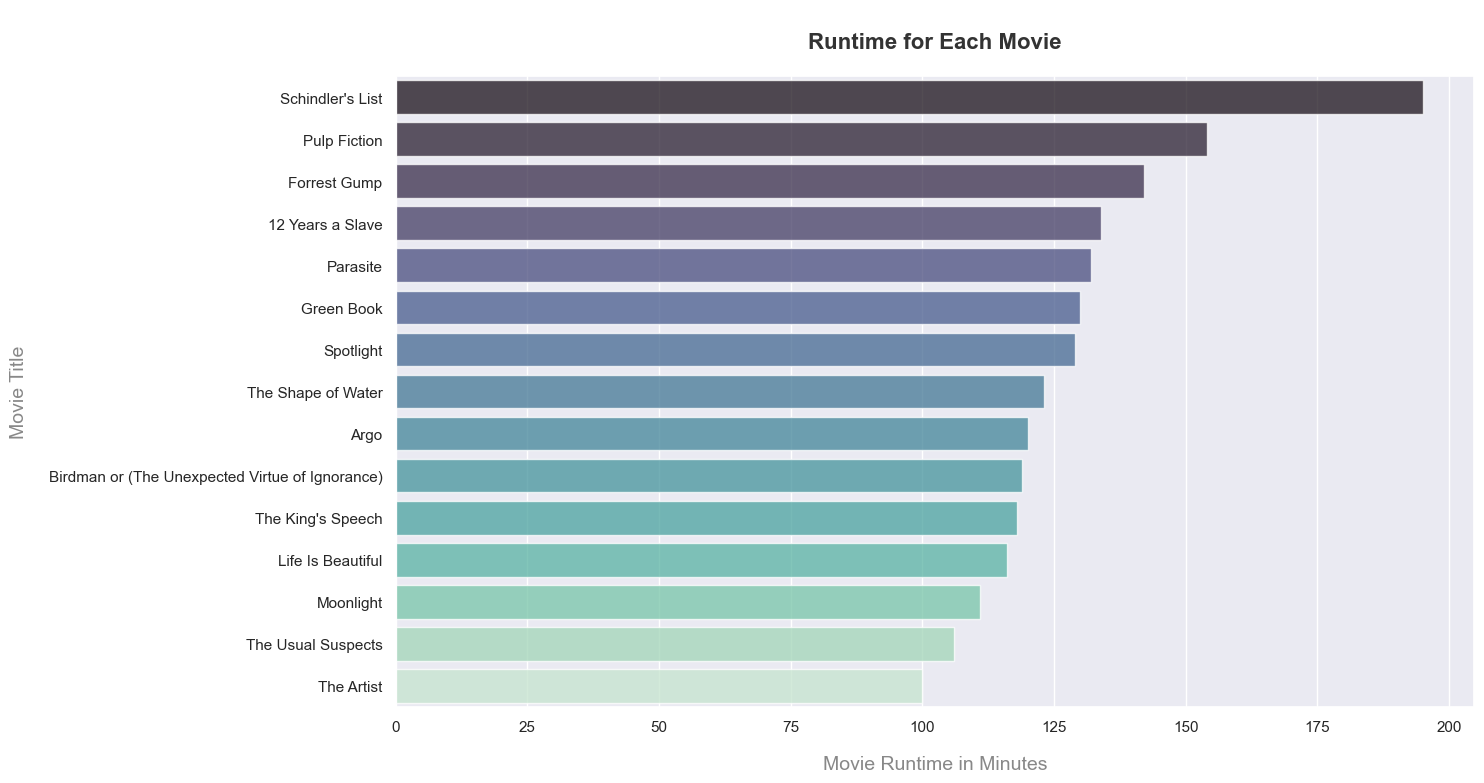

In [336]:
# Generate chart
plt.figure(figsize=(15, 8))
runtime_plot_sorted = sns.barplot(y=MOVIE_TITLE, x=RUNTIME,
                                  data=sorted_runtime_df,
                                  palette='mako', alpha=0.75)
plt.title('\nRuntime for Each Movie')
plt.xlabel(RUNTIME_MINS)
plt.tight_layout()
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 2/4</small>
### What movie had the longest runtime?

Based on the above horizontal bar chart and markdown table, the movie with the longest runtime is **Shindler's List** at **195 minutes**.

In [337]:
sorted_runtime_df.head(1)

,Movie Title,Runtime
10,Schindler's List,195


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 3/4</small>
### Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

To analyze the relationship between the movie's runtime and the number of awards it won, I created a scatter plot with "Runtime" on the x-axis and "Award Wins" on the y-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart shows a weak negative correlation between the movie's runtime and number of awards it won. As the runtime of a movie increases, there's a slight tendency for it to win fewer awards, but the relationship is not strong. This is a good case to demonstrate that *"correlation doesn't equal causation"*.

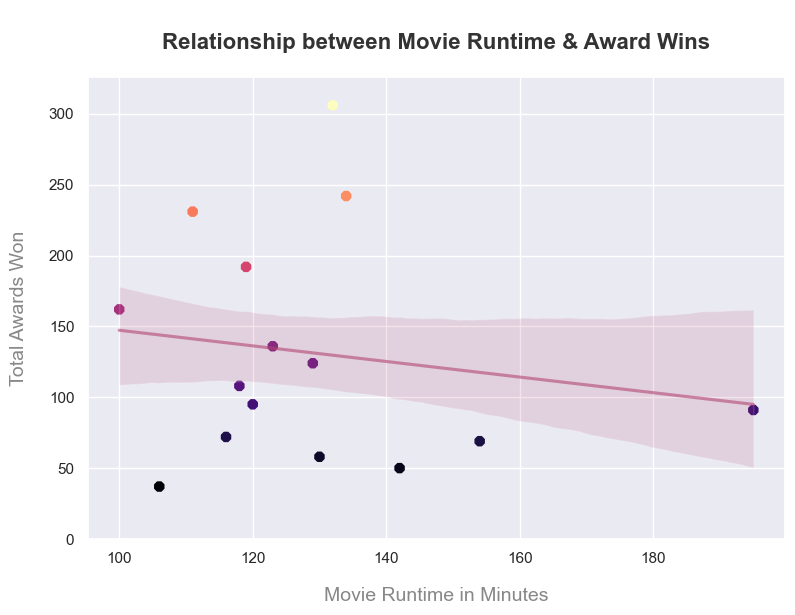

In [338]:
y_upper_limit = movies_df[AWARD_WINS].max() + 20

fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(movies_df[RUNTIME], movies_df[AWARD_WINS],
                     c=movies_df[AWARD_WINS],
                     cmap='magma', s=50, marker='8')
sns.regplot(x=RUNTIME, y=AWARD_WINS, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax, ci=75)
ax.set_ylim(0, y_upper_limit)
ax.set_title('\nRelationship between Movie Runtime & Award Wins')
ax.set_xlabel(RUNTIME_MINS)
ax.set_ylabel('Total Awards Won')
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 4/4</small>
### How many awards and nominations did each movie receive?

I loaded the dataset and identified the relevant columns: "Oscar Wins", "Award Wins", "Award Nominations" and "Movie Title". I then created a new column called "Total Awards and Nominations" which is the sum of "Award Wins" and "Award Nominations". I then sorted the data by "Total Awards and Nominations" and plotted the data.<br><br>

| Movie Title                                     |   Total Awards and Nominations |
|:------------------------------------------------|-------------------------------:|
| 12 Years a Slave                                |                            579 |
| Parasite                                        |                            570 |
| Moonlight                                       |                            531 |
| The Shape of Water                              |                            486 |
| Birdman or (The Unexpected Virtue of Ignorance) |                            485 |
| The Artist                                      |                            366 |
| The King's Speech                               |                            314 |
| Spotlight                                       |                            268 |
| Argo                                            |                            251 |
| Green Book                                      |                            181 |
| Pulp Fiction                                    |                            141 |
| Schindler's List                                |                            140 |
| Life Is Beautiful                               |                            124 |
| Forrest Gump                                    |                            124 |
| The Usual Suspects                              |                             54 |

In [339]:
# Generate markdown table
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]
movies_df_sorted = movies_df.sort_values(by=TOTALS, ascending=False)
awards_and_noms_df = movies_df_sorted[[MOVIE_TITLE, TOTALS]]
markdown_table = awards_and_noms_df.to_markdown(index=False)

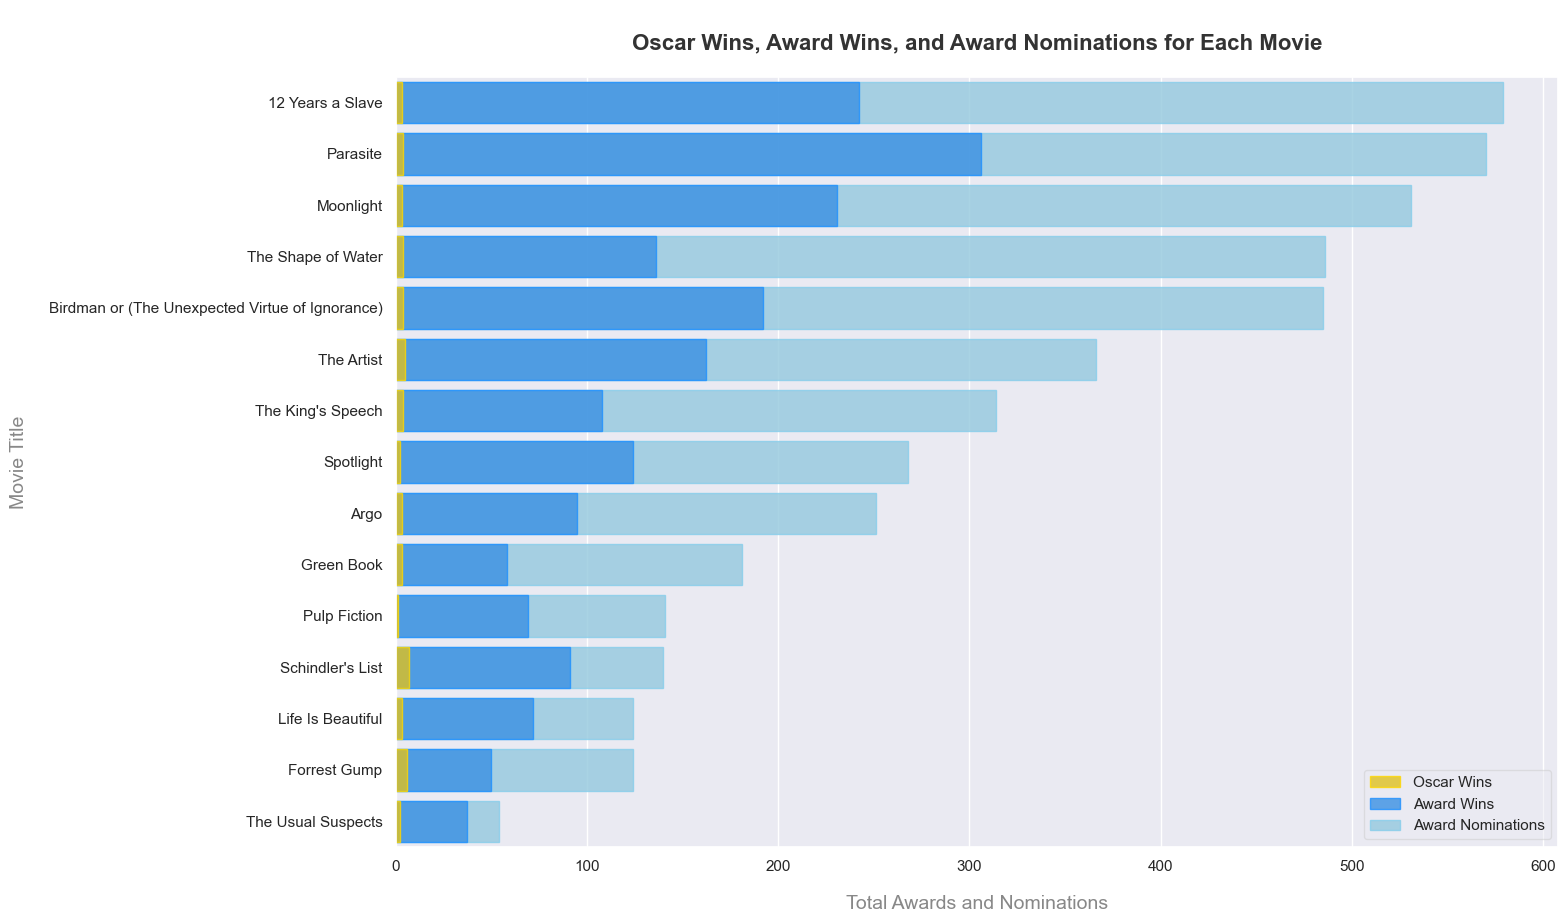

In [340]:
# Generate chart
plt.figure(figsize=(15, 10))
colors = ['skyblue', 'dodgerblue', 'gold']
labels = [AWARD_NOMS, AWARD_WINS, OSCAR_WINS]
cols = [TOTALS, AWARD_WINS, OSCAR_WINS]

for col, color, label in zip(cols, colors, labels):
    sns.barplot(data=movies_df_sorted, y=MOVIE_TITLE, x=col, color=color,
                label=label, edgecolor=color, alpha=0.8)

plt.xlabel(TOTALS)
plt.ylabel(MOVIE_TITLE)
plt.title('\nOscar Wins, Award Wins, and Award Nominations for Each Movie')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower right')
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 1/4</small>
### Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

To analyze the relationship between box office earnings and total nominations, I created a scatter plot with "Box Office Earnings" on the y-axis and "Total Nominations" on the x-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart indicates a weak negative linear relationship between total nominations and box office earnings. As the number of total nominations for a movie increases, its box office earnings tend to decrease slightly. The movie Forrest Gump is a significant outlier with much higher box office earnings than the other movies in the dataset, which may be slightly skewing the correlation.

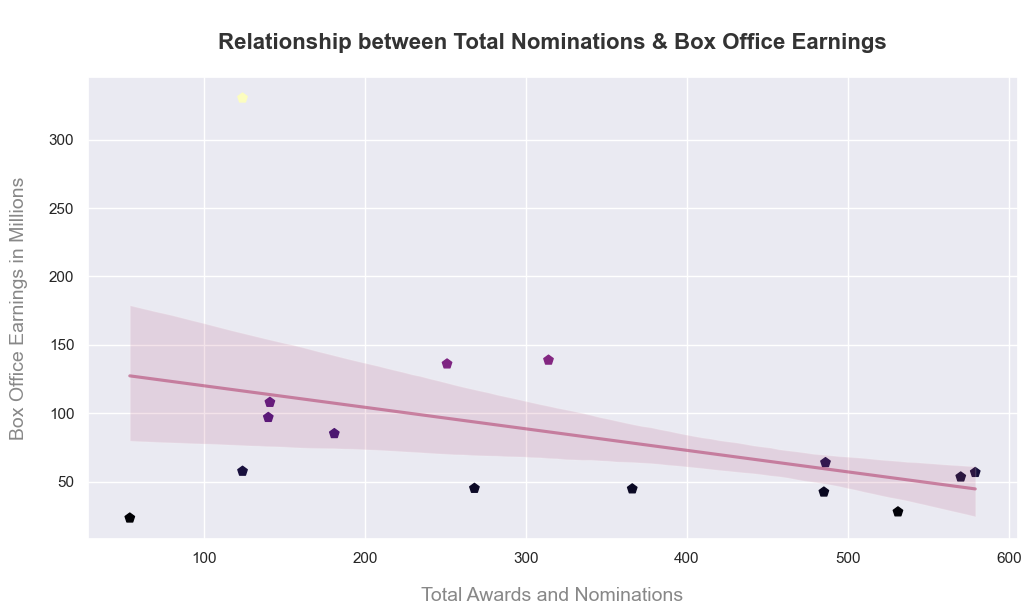

In [341]:
movies_df[BOX_OFFICE_MIL] = TO_MIL
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(movies_df[TOTALS], movies_df[BOX_OFFICE_MIL],
                     c=movies_df[BOX_OFFICE_MIL],
                     cmap='magma', s=50, marker='p')
sns.regplot(x=TOTALS, y=BOX_OFFICE_MIL, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax, ci=75)
ax.set_title('\nRelationship between Total Nominations & Box Office Earnings')
ax.set_xlabel(TOTALS)
ax.set_ylabel(BOX_OFFICE_MIL)
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 2/4</small>
### Is there a relationship between box office earnings and movie runtimes?

I loaded the dataset and identified the relevant columns: "Box Office" and "Runtime". I then created a scatter plot with "Box Office" on the y-axis and "Runtime" on the x-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The regression line in the chart below shows a positive slope, indicating a positive correlation between runtime and box office earnings. This suggests that, in general, as runtime increases, box office earnings also increase.

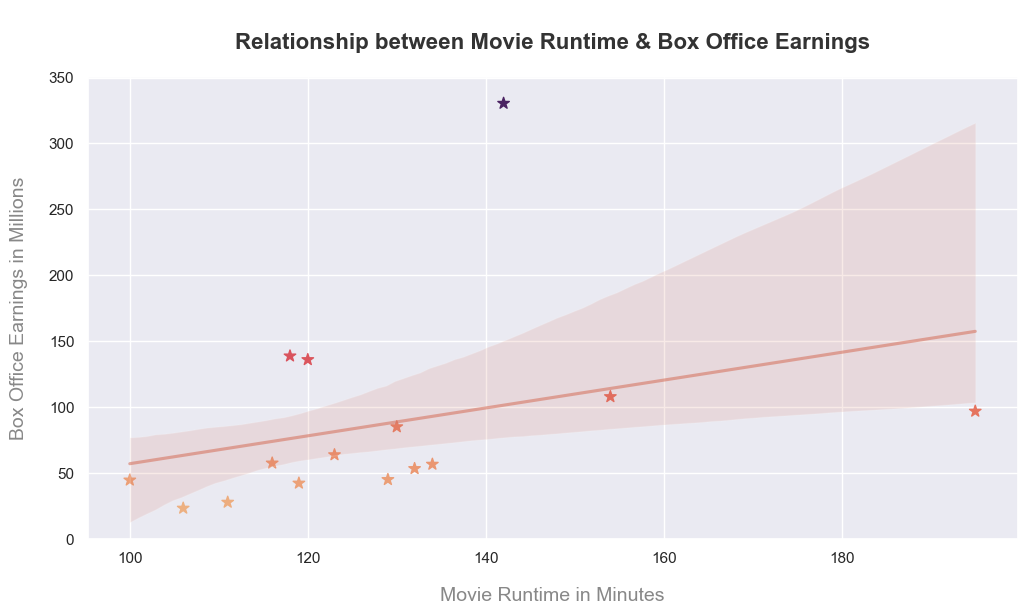

In [342]:
y_upper_limit = movies_df[BOX_OFFICE_MIL].max() + 20

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(movies_df[RUNTIME], movies_df[BOX_OFFICE_MIL],
                     c=movies_df[BOX_OFFICE_MIL],
                     cmap='flare', s=75, marker='*')
sns.regplot(x=RUNTIME, y=BOX_OFFICE_MIL, data=movies_df, scatter=False,
            line_kws={'color':'#D67663', 'alpha':0.6}, ax=ax, ci=75)
ax.set_ylim(0, y_upper_limit)
ax.set_title('\nRelationship between Movie Runtime & Box Office Earnings')
ax.set_xlabel(RUNTIME_MINS)
ax.set_ylabel(BOX_OFFICE_MIL)
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 3/4</small>
### How much did each movie earn at the box office?

I loaded the dataset and identified the relevant columns: "Movie Title" and "Box Office". I then sorted the data by "Box Office" and plotted the data.<br><br>

| Movie Title                                     | Box Office Earnings in USD   |
|:------------------------------------------------|:-----------------------------|
| Forrest Gump                                    | $330,455,270.00              |
| The King's Speech                               | $138,797,449.00              |
| Argo                                            | $136,025,503.00              |
| Pulp Fiction                                    | $107,928,762.00              |
| Schindler's List                                | $96,898,818.00               |
| Green Book                                      | $85,080,171.00               |
| The Shape of Water                              | $63,859,435.00               |
| Life Is Beautiful                               | $57,563,264.00               |
| 12 Years a Slave                                | $56,671,993.00               |
| Parasite                                        | $53,369,749.00               |
| Spotlight                                       | $45,055,776.00               |
| The Artist                                      | $44,671,682.00               |
| Birdman or (The Unexpected Virtue of Ignorance) | $42,340,598.00               |
| Moonlight                                       | $27,854,932.00               |
| The Usual Suspects                              | $23,341,568.00               |

In [343]:
# Generate markdown table
movies_df[USD] = movies_df[BOX_OFFICE].apply(lambda usd: f'${usd:,.2f}')
sorted_movies_df = movies_df.sort_values(by=BOX_OFFICE, ascending=False)
markdown_table = sorted_movies_df[[MOVIE_TITLE, USD]].to_markdown(index=False)

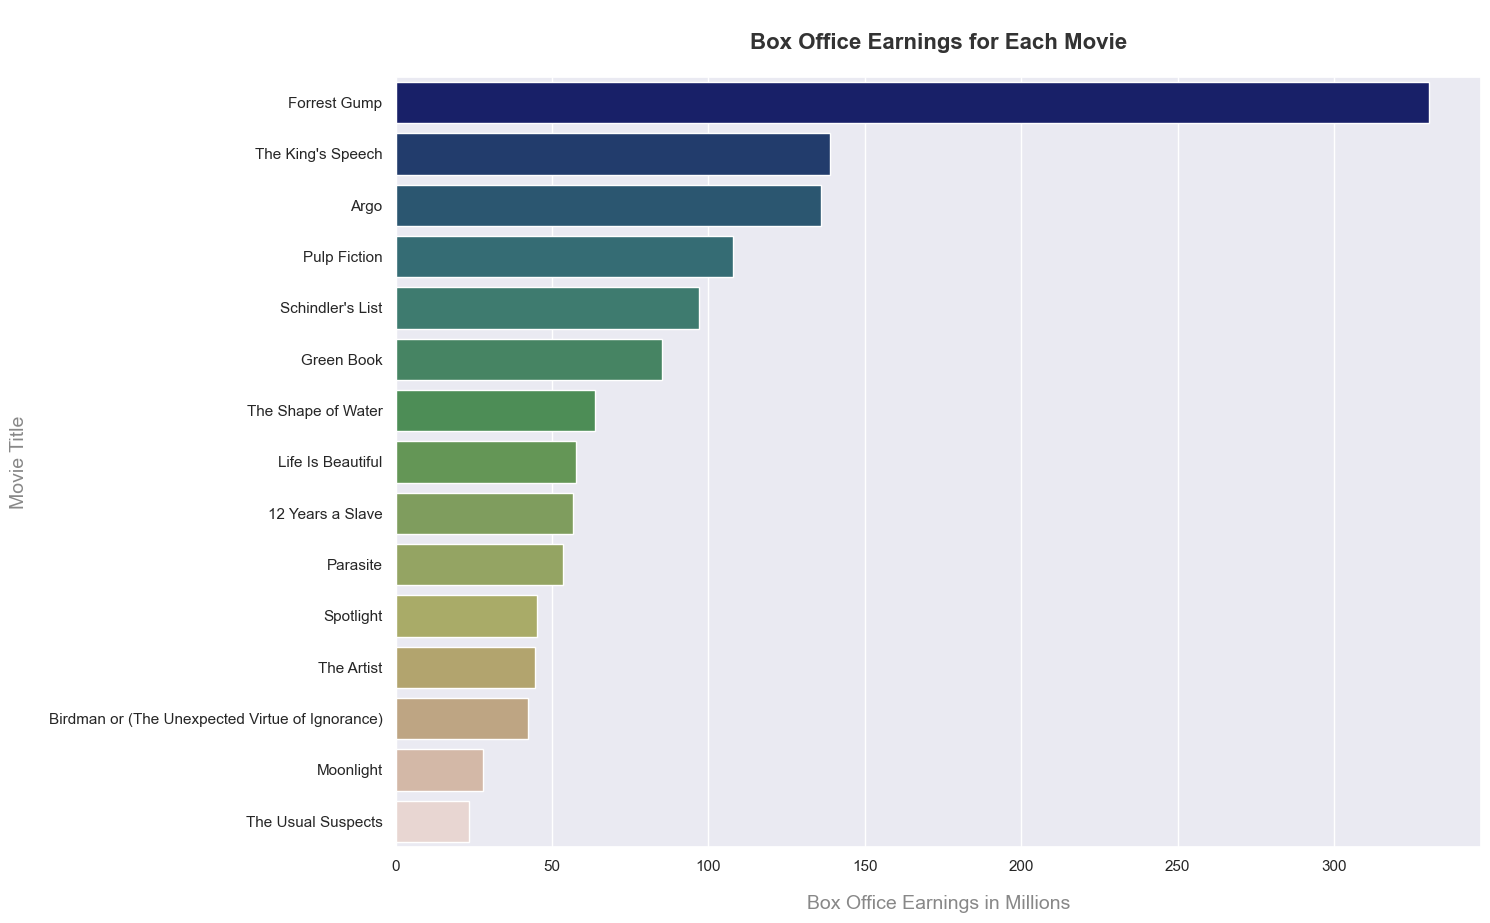

In [344]:
# Generate chart
plt.figure(figsize=(14, 10))
chart = sns.barplot(y=MOVIE_TITLE, x=BOX_OFFICE_MIL, data=sorted_movies_df, 
                    palette='gist_earth')
plt.title('\nBox Office Earnings for Each Movie')
plt.xlabel(BOX_OFFICE_MIL)
plt.ylabel(MOVIE_TITLE)
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 4/4</small>
### What is the total count of each genre present in the dataset? 

I loaded the dataset and identified the relevant columns: "Movie Title" and "Genre". I then split the "Genre" column into multiple columns using the `str.split()` method and exploded the resulting list into rows using the `df.explode()` method. I then grouped the data by genre and counted the number of movies in each genre. I then sorted the data by count and plotted the data.<br><br>

| Genre     |   Total Genre Count |
|:----------|--------------------:|
| Drama     |                  15 |
| Biography |                   6 |
| Comedy    |                   4 |
| Romance   |                   4 |
| Crime     |                   3 |
| History   |                   3 |
| Thriller  |                   2 |
| Fantasy   |                   1 |
| Mystery   |                   1 |

In [345]:
# Generate markdown table
genre_counts = movies_df[GENRE].str.split(', ').explode().value_counts()
genre_df = genre_counts.reset_index()
genre_df.columns = [GENRE, TOTAL]
markdown_table = genre_df.to_markdown(index=False)

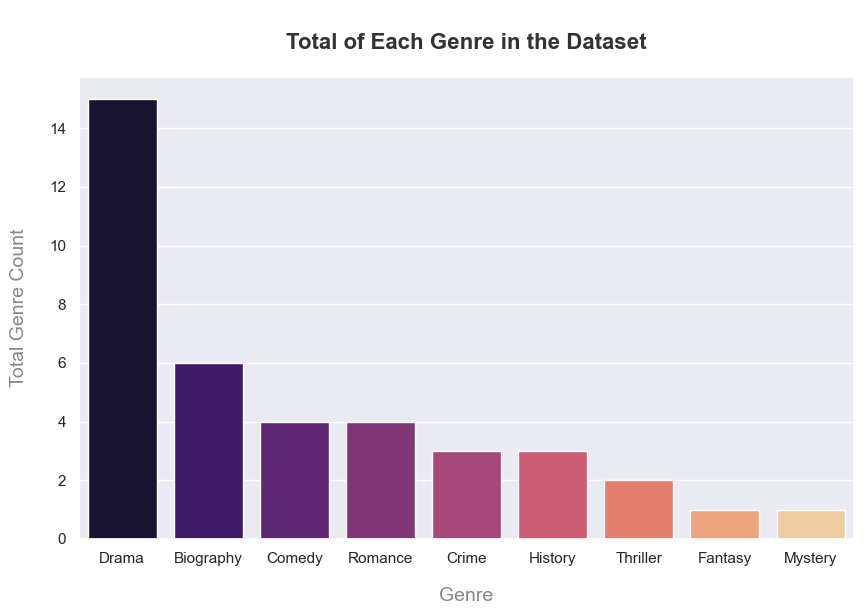

In [346]:
plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.values, x=genre_counts.index, palette="magma")
plt.title('\nTotal of Each Genre in the Dataset')
plt.ylabel(TOTAL)
plt.xlabel(GENRE)
plt.show()